<a href="https://colab.research.google.com/github/Suwandi-amin-sangaji/TA_Skripsi/blob/main/TugasSkripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [57]:
base_dir = '/content/drive/MyDrive/dataset/coba'

In [67]:
# let's prepare the data and generate the data
# rescale=1./255,
# rotation_range=40,
# width_shift_range=0.2,
# height_shift_range=0.2,
# shear_range=0.2,
# zoom_range=0.2,
# horizontal_flip=True,
# fill_mode='nearest'

gen_train = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                              )

train_data = gen_train.flow_from_directory(base_dir,
                                           target_size = (224, 224), 
                                           batch_size = 32, 
                                           class_mode="categorical")

Found 424 images belonging to 7 classes.


In [68]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

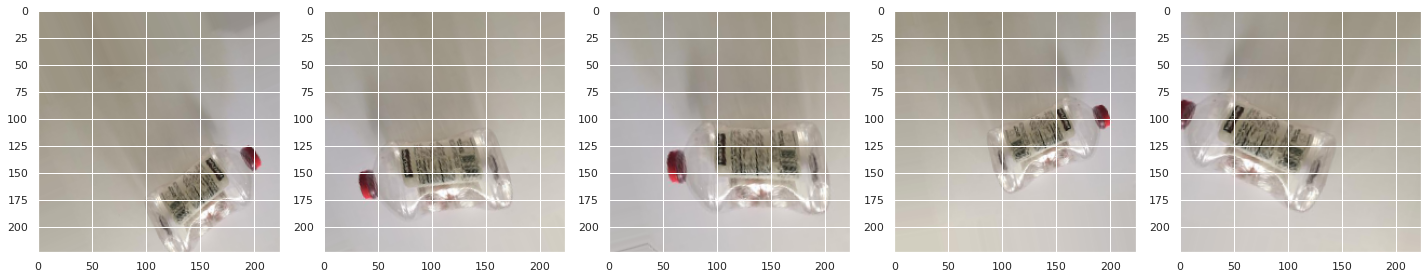

In [69]:
# showing augmented images
images = [train_data[0][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Traingn images')

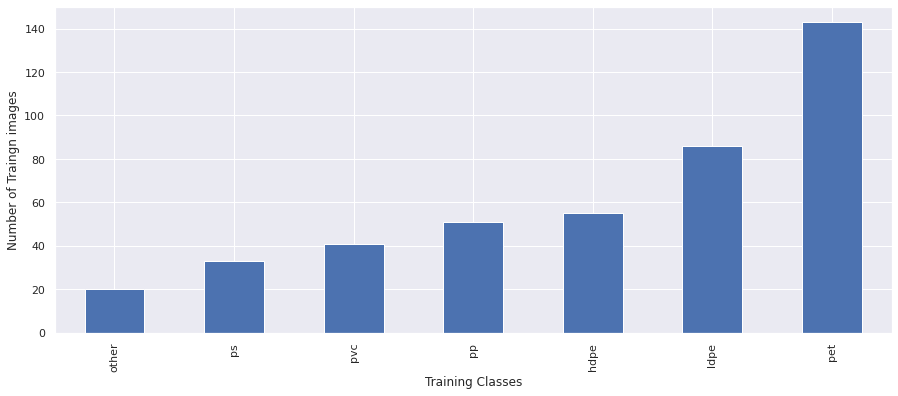

In [61]:
import os
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(base_dir):
    data_dic[folder] = len(os.listdir(base_dir + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [10]:
#membuat model
# Mencoba menggunakan parameter model VGG16 

from tensorflow.keras.applications.vgg16 import VGG16

# mengambil input bentuk, bobot, dan bias dari imagenet dan menyertakan cara False teratas
# dan menambahkan lapisan input, meratakan dan output sendiri
vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [11]:
# sekarang beban vgg16 sudah melatih jadi saya tidak ingin melatih beban itu lagi
# jadi mari kita buat yang bisa layer.trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [12]:
#  tambahkan layer flatten atau   sambungkan VGG16 dengan layer flatten  sendiri
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)
# sekarang  tambahkan lapisan keluaran atau lapisan prediksi
prediction = layers.Dense(units = 7, activation="softmax")(x)

# membuat object
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

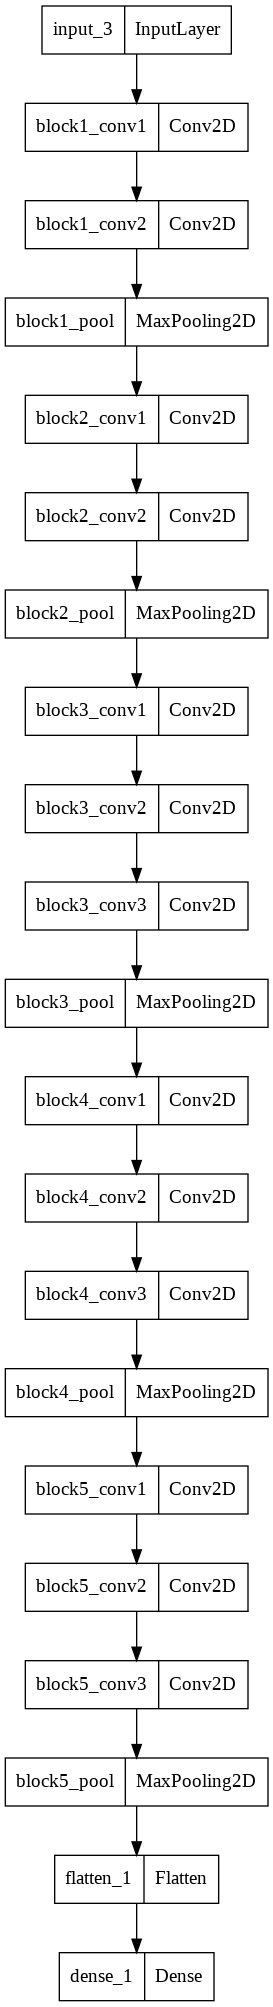

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)
plot_model(model)

In [13]:
# Melatih model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["acc"])

result = model.fit(train_data, 
                   epochs = 18, 
                   steps_per_epoch=len(train_data)
                   )

Epoch 1/18
14/14 [==============================] - 255s 18s/step - loss: 2.1091 - acc: 0.3208
Epoch 2/18
14/14 [==============================] - 231s 16s/step - loss: 1.4249 - acc: 0.5236
Epoch 3/18
14/14 [==============================] - 228s 16s/step - loss: 1.2224 - acc: 0.5943
Epoch 4/18
14/14 [==============================] - 225s 16s/step - loss: 1.1036 - acc: 0.6297
Epoch 5/18
14/14 [==============================] - 227s 17s/step - loss: 0.9888 - acc: 0.6698
Epoch 6/18
14/14 [==============================] - 227s 16s/step - loss: 0.8867 - acc: 0.7146
Epoch 7/18
14/14 [==============================] - 227s 16s/step - loss: 0.8491 - acc: 0.7146
Epoch 8/18
14/14 [==============================] - 225s 16s/step - loss: 0.7407 - acc: 0.7547
Epoch 9/18
14/14 [==============================] - 225s 16s/step - loss: 0.7233 - acc: 0.7807
Epoch 10/18
14/14 [==============================] - 226s 16s/step - loss: 0.7305 - acc: 0.7759
Epoch 11/18
14/14 [==============================

In [14]:
#evaluasi model
score = model.evaluate(train_data)
print('Test Loss :',score[0])
print('Test Accuracy :',score[1])

14/14 [==============================] - 231s 16s/step - loss: 0.5241 - acc: 0.8255
Test Loss : 0.5240602493286133
Test Accuracy : 0.8254716992378235


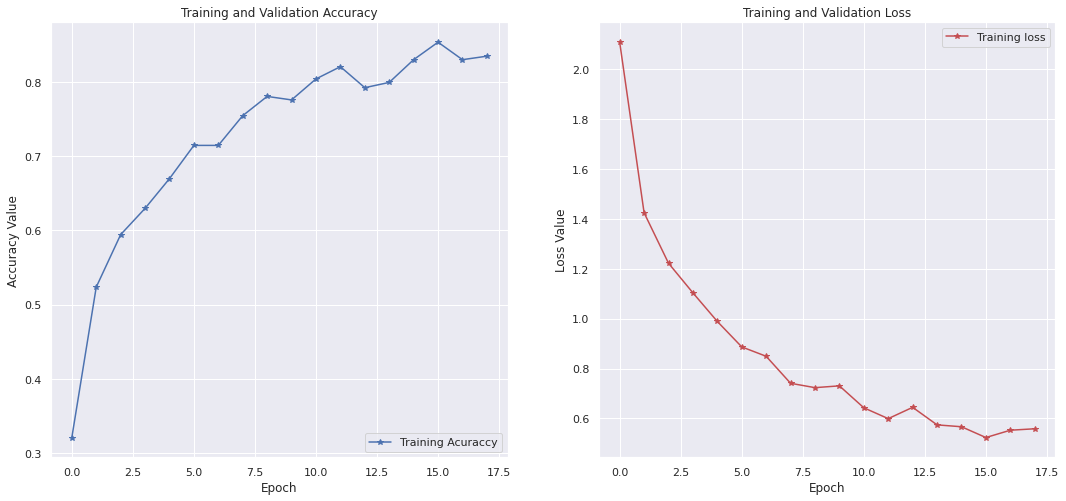

In [40]:
# Plot accuracy and loss for testing and validation

acc = result.history['acc']
loss = result.history['loss']

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, 'b-*', label = 'Training Acuraccy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, 'r-*', label = 'Training loss')
plt.legend(loc='upper right')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
from tensorflow.keras.preprocessing import image
classes = ['HDPE', 'LDPE', 'OTHER', 'PET', 'PP', 'PS', 'PVC']
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = classes[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

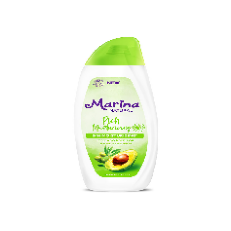

Your waste material is  HDPE  with  99.75  % accuracy


In [66]:
waste_prediction('/content/drive/MyDrive/dataset/coba/hdpe/20021330_1.jpeg')

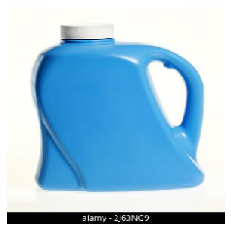

Your waste material is  HDPE  with  99.99  % accuracy


In [26]:
waste_prediction('/content/drive/MyDrive/dataset/coba/hdpe/2j63ng9.jpeg')

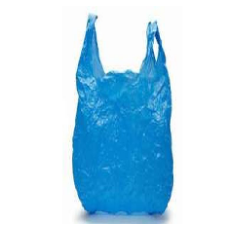

Your waste material is  LDPE  with  100.0  % accuracy


In [27]:
waste_prediction('/content/drive/MyDrive/dataset/coba/ldpe/1943498Plastikp.jpeg')

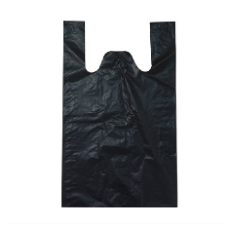

Your waste material is  LDPE  with  100.0  % accuracy


In [28]:
waste_prediction('/content/drive/MyDrive/dataset/coba/ldpe/Kantong_Plastik_Hitam_Uk_35.jpg')

In [29]:
#Save Model 
model.save("/content/drive/MyDrive/dataset/coba/classifyWaste.h5")

In [31]:
# model = load_model('/content/drive/MyDrive/dataset/datasets-plastik/ClassifyWaste.h5')
new_model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/coba/classifyWaste.h5')

# Check its architecture
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:
# Evaluate the restored model
history, acc = new_model.evaluate(train_data) #verbose=1
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

# print(new_model.predict(train_data).shape)

14/14 [==============================] - 251s 17s/step - loss: 0.5358 - acc: 0.8255
Restored model, accuracy: 82.55%
(424, 7)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn